# My goal is to predict which group to call with an offer.

## Accurately predicting variable:
### - whether the customer has subscriptions

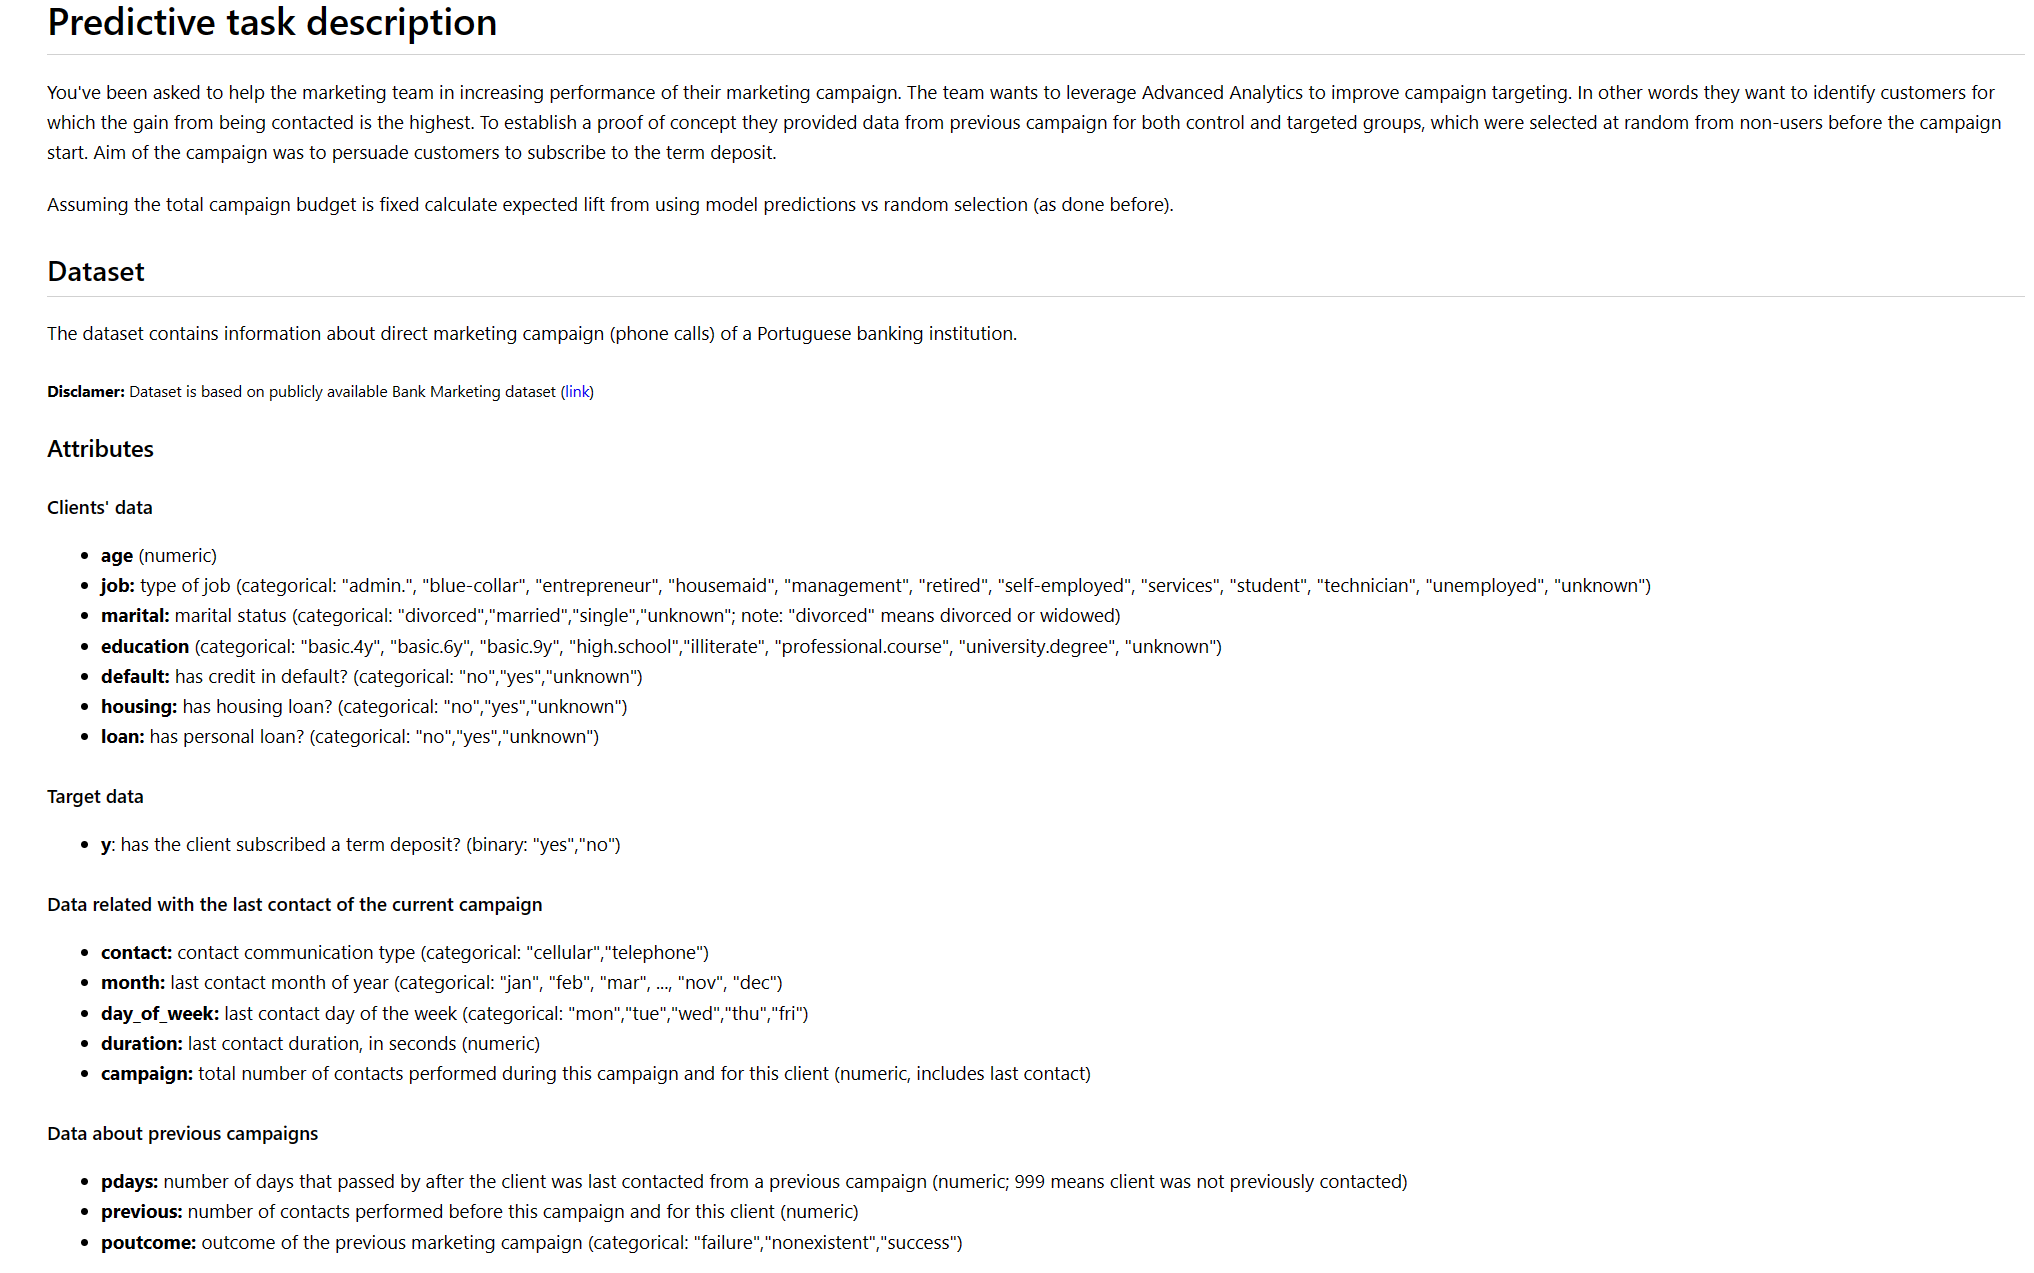
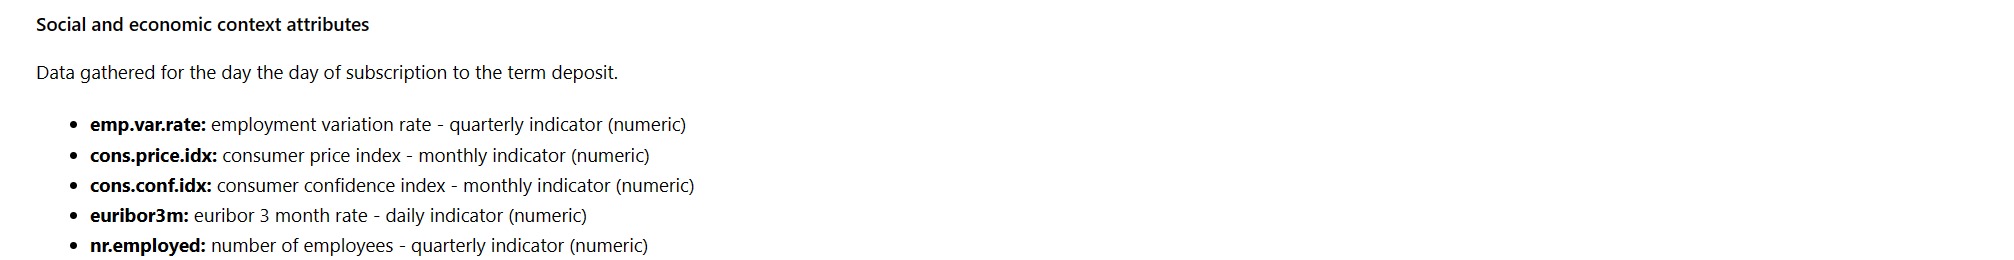

# The problem presented is a classification problem. I would like to use 3 models for this purpose. 
- Decision trees model 
- Logistic regression model
- KNeighborsClassifier
### Once the models are implemented, I will make a decision on which model is better

In [452]:
# import library
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# data read
data = pd.read_csv("bank_data_prediction_task.csv")
data = data.drop(['Unnamed: 0','test_control_flag'], axis=1)
data

age          job  marital            education  default housing loan  \
0       37     services  married          high.school       no     yes   no   
1       56     services  married          high.school       no      no  yes   
2       41  blue-collar  married              unknown  unknown      no   no   
3       25     services   single          high.school       no     yes   no   
4       25     services   single          high.school       no     yes   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   29   unemployed   single             basic.4y       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...       1.0    999         0   
1      telephone   may         mon  ...       1.0    999         0   
2      telephone   may         mon  ...       1.0    999         0   
3      telephone   may         mon  ...       1.0    999         0   
4      telephone   may         mon  ...       1.0    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183        NaN   NaN         NaN  ...       NaN      9         1   
41184        NaN   NaN         NaN  ...       NaN    999         0   
41185        NaN   NaN         NaN  ...       NaN    999         0   
41186        NaN   NaN         NaN  ...       NaN    999         0   
41187        NaN   NaN         NaN  ...       NaN    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183      success         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0  yes  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6   no  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# Preprocessing

In [312]:
# data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         16476 non-null  object 
 8   month           16476 non-null  object 
 9   day_of_week     16476 non-null  object 
 10  duration        16476 non-null  float64
 11  campaign        16476 non-null  float64
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  40938 non-null  float64
 17  cons.conf.idx   41188 non-null 

### I want to change object data to category data

In [453]:
# change object to category
for col in ['marital', 'education', 'default', 'housing','loan','contact','month','day_of_week','poutcome','y']:
    data[col] = data[col].astype('category')
    
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         16476 non-null  category
 8   month           16476 non-null  category
 9   day_of_week     16476 non-null  category
 10  duration        16476 non-null  float64 
 11  campaign        16476 non-null  float64 
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  40938 non-null  float64 
 17  cons.conf.id

### Checking the null values

In [454]:
# check null values
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact           24712
month             24712
day_of_week       24712
duration          24712
campaign          24712
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx      250
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

In [455]:
# null percent values
data.isnull().sum() / len(data)

age               0.000000
job               0.000000
marital           0.000000
education         0.000000
default           0.000000
housing           0.000000
loan              0.000000
contact           0.599981
month             0.599981
day_of_week       0.599981
duration          0.599981
campaign          0.599981
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.006070
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

### check the values in numerical column cons.price.idx where we have null values

In [456]:
data['cons.price.idx'].value_counts()

cons.price.idx
93.994    7719
93.918    6643
92.893    5762
93.444    5147
94.465    4353
93.200    3588
93.075    2440
92.201     764
92.963     709
92.431     444
92.649     356
94.215     311
94.199     301
92.843     281
92.379     265
93.369     260
94.027     231
94.055     227
93.876     211
94.601     204
92.469     176
92.713     172
93.749     172
94.767     127
93.798      66
92.756       9
Name: count, dtype: int64

<Axes: xlabel='cons.price.idx', ylabel='count'>

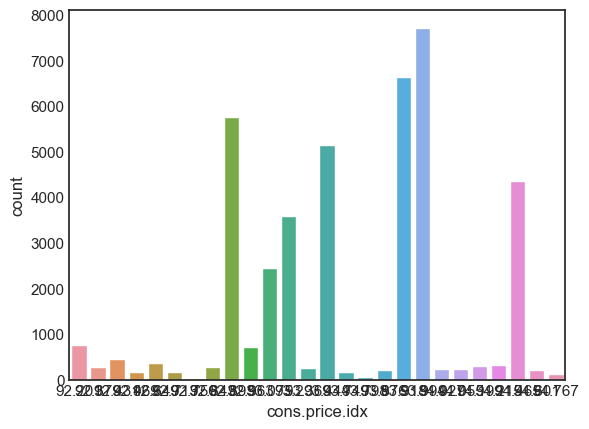

In [457]:
# lets check on chart

sns.countplot(x='cons.price.idx',data=data)

## we see that the most common value is the value 92.893, but it is not sufficiently ahead of the rest of the set of values to use the most common value, so in this case I will fill in the missing data with the average value of the column set.

In [458]:
# vill nulls with mean
mean=data['cons.price.idx'].mean() 
data['cons.price.idx'].fillna(value=mean, inplace=True)

In [459]:
# checking null
data.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact           24712
month             24712
day_of_week       24712
duration          24712
campaign          24712
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

## delete null values

In [460]:
data = data.dropna()

# Data Analysis

## Let's check the variable distributions to remove unnecessary data

<Axes: xlabel='count', ylabel='job'>

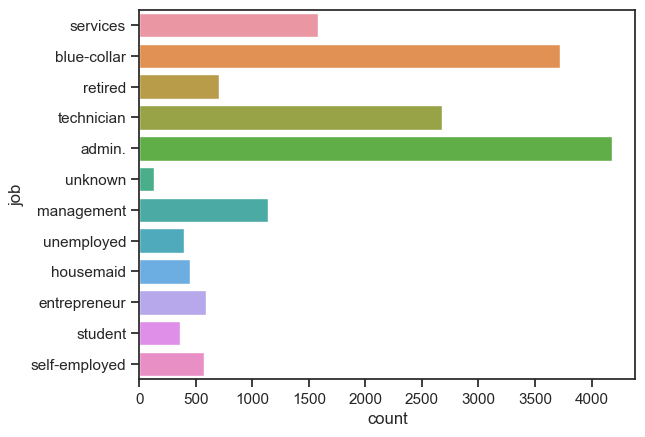

In [461]:
# Distribution for the Job column
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

In [462]:
# delete unknown values
data = data[data.job != 'unknown']

<Axes: xlabel='count', ylabel='housing'>

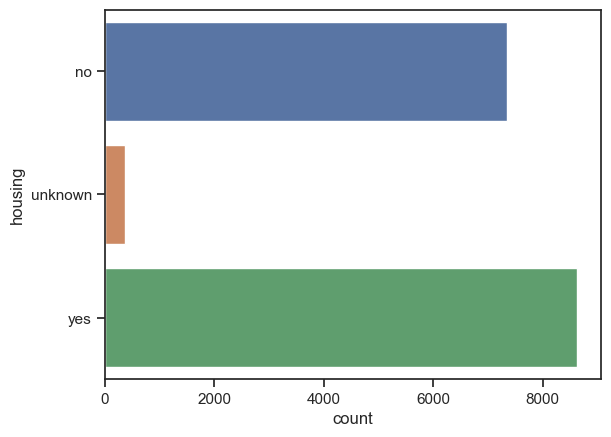

In [323]:
# distribution for  housing column
sns.set(style="ticks", color_codes=True)
sns.countplot(y='housing', data=data)

In [463]:
# delete unknown values
data = data[data.housing != 'unknown']

In [325]:
# distribution for loan
data['loan'].value_counts()

loan
no         13539
yes         2443
unknown        0
Name: count, dtype: int64

In [326]:
# Distribution for the pdays column
data['pdays'].value_counts()

pdays
999    15397
3        164
6        156
4         50
7         24
9         22
10        21
12        19
5         19
2         18
1         17
13        13
11        12
15        11
8         10
14        10
0          5
16         4
18         3
21         2
19         2
26         1
20         1
17         1
Name: count, dtype: int64

In [464]:
# changing the value 999 to 30 to better standarization in column pdays

def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

# check the changes
data['pdays'].value_counts()

pdays
30    15397
3       164
6       156
4        50
7        24
9        22
10       21
12       19
5        19
2        18
1        17
13       13
11       12
15       11
8        10
14       10
0         5
16        4
18        3
21        2
19        2
26        1
20        1
17        1
Name: count, dtype: int64

## Pairplot

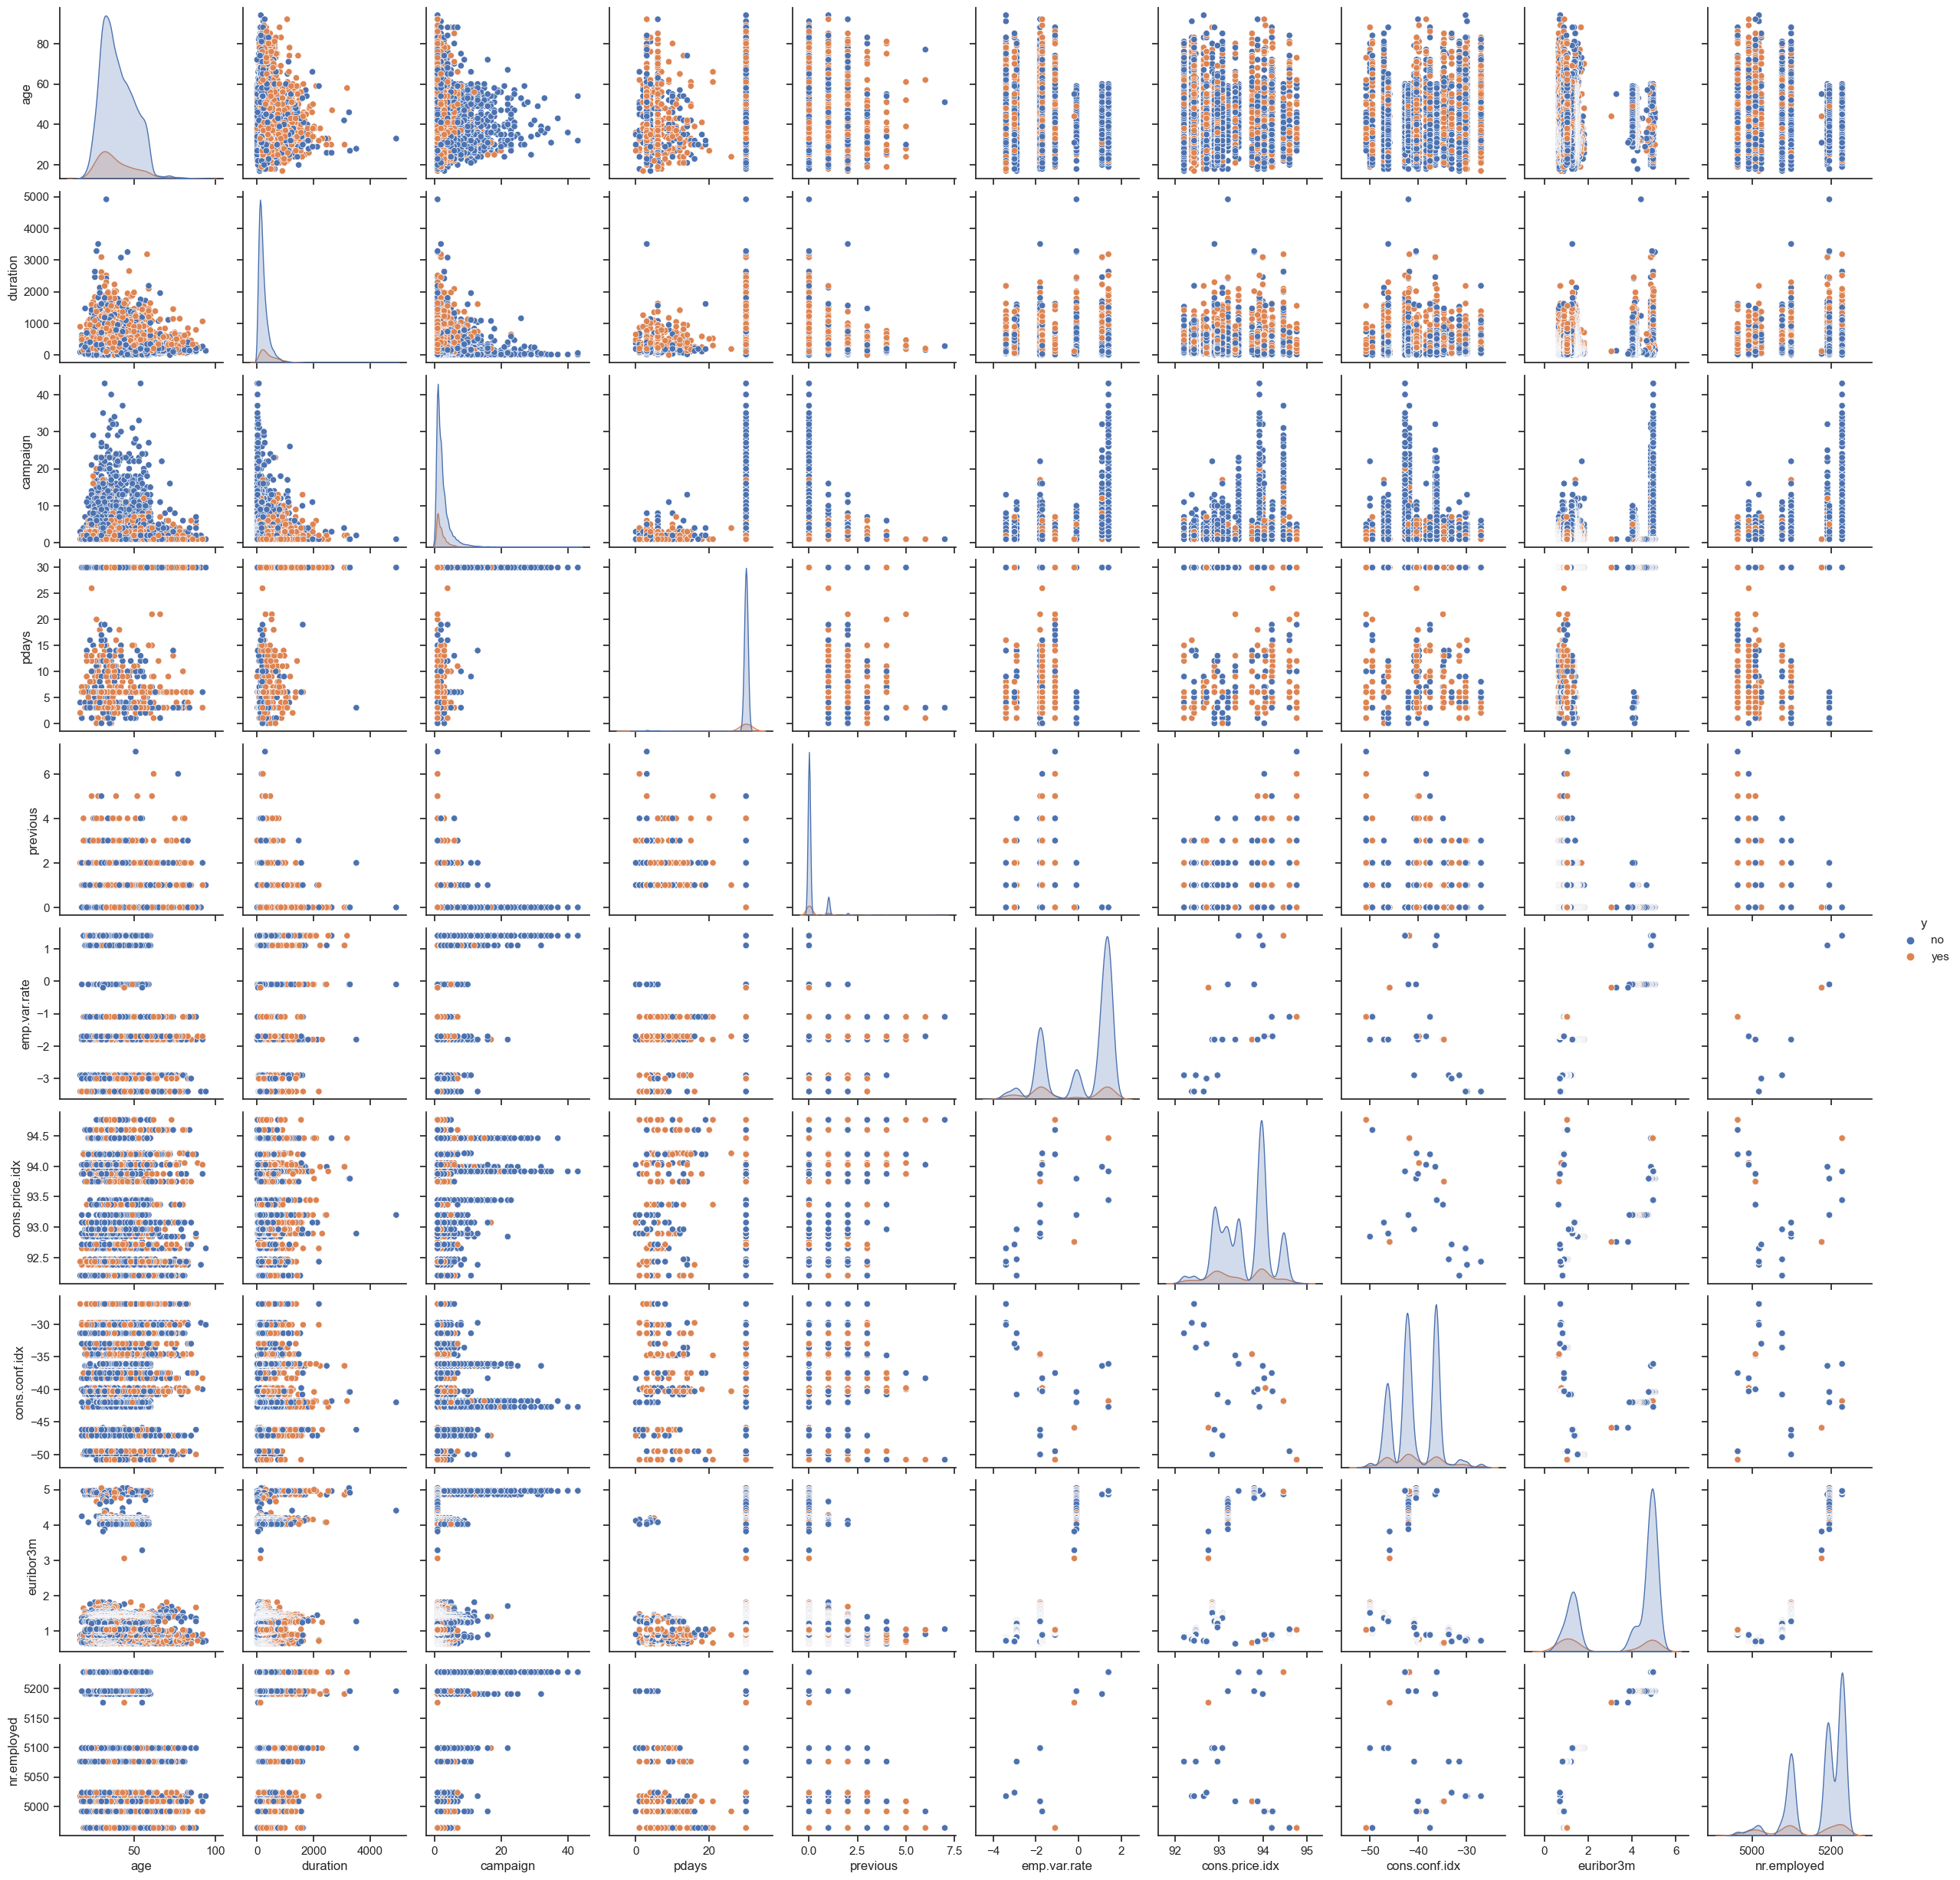

In [224]:
sns.pairplot(data, hue='y')

- For most of the variables our pair plot is overlapping a lot.

## split data for categorical and numerical

In [465]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical]
numerical.remove('y')

In [466]:
# print categorical and numerical data

print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## Correlation matrix of numerical features

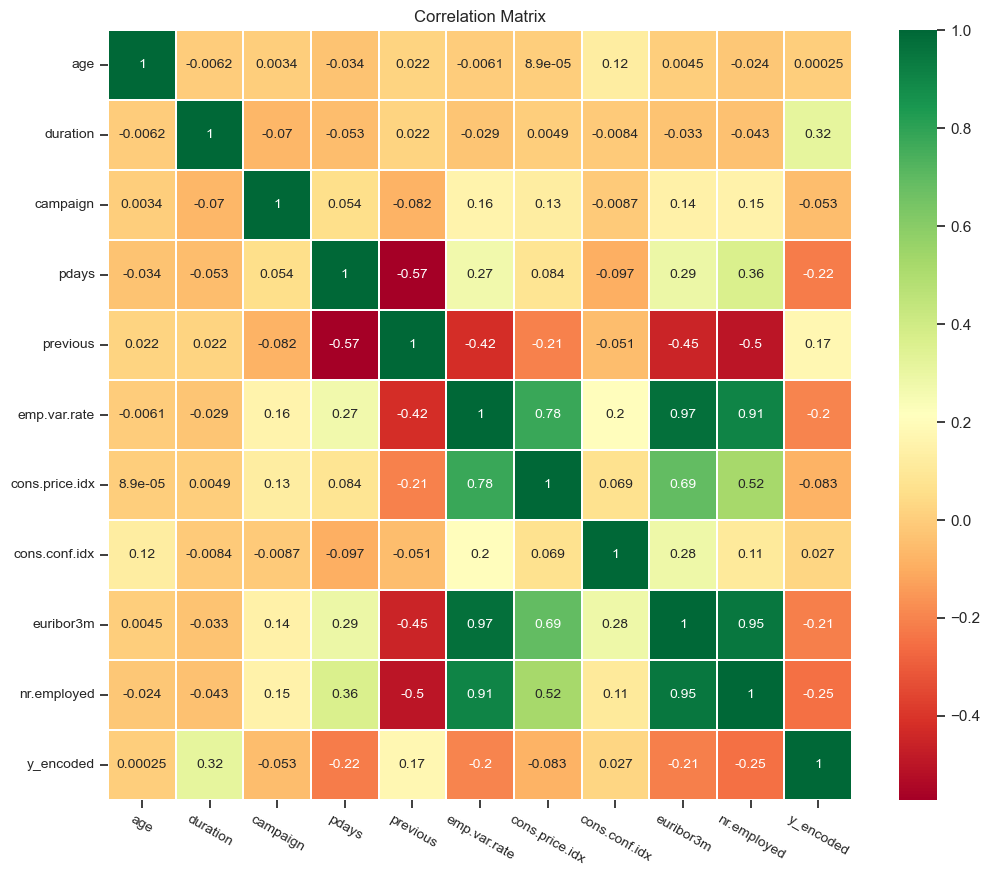

In [467]:
# correlation for y

from matplotlib import pyplot as plt

# change y column for numerical values encode
data['y_encoded'] = data['y'].map({'no': 0, 'yes': 1})

# correlation 
corr_data = data[numerical + ['y_encoded']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

data = data.drop(['y_encoded'], axis=1)

Observation:
- Over numerical features have very less correlation between them.
- duration are correlated with test_control_flag feature
- euribor3m, emp.var.rate, cons.price.idx, nr.employed are correlated

## Outlier detection for numerical attributes using IQR

In [468]:
# creating new data frame of numerical columns 
data_numerical = data[numerical]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (15982, 10)


age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   37     226.0       1.0     30         0           1.1          93.994   
1   56     307.0       1.0     30         0           1.1          93.994   
2   41     217.0       1.0     30         0           1.1          93.994   
3   25      50.0       1.0     30         0           1.1          93.994   
4   25     222.0       1.0     30         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  
0          -36.4      4.857       5191.0  
1          -36.4      4.857       5191.0  
2          -36.4      4.857       5191.0  
3          -36.4      4.857       5191.0  
4          -36.4      4.857       5191.0

In [469]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age                15.000
duration          218.750
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [470]:
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))

4215 points are outliers based on IQR


In [471]:
data.shape

(15982, 21)

# Preprocessing

## the last thing we will do in pre-processing is to convert categorical text values into numerical values 0, 1. We standarize numerical data. We will also assign values for X and Y to the target variable

<Axes: xlabel='y', ylabel='count'>

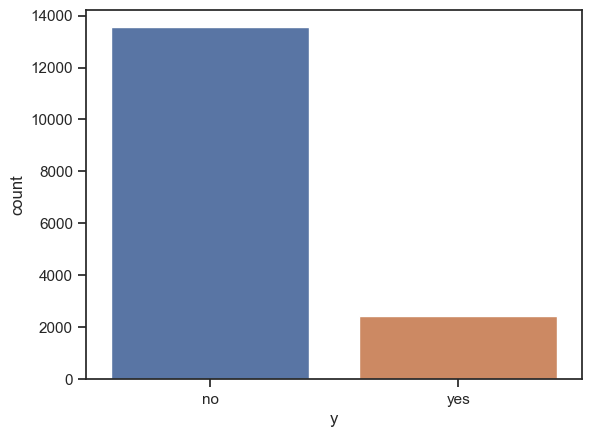

In [472]:
# let's check this in the graph for the y variable

sns.countplot(x='y',data=data)

### in addition, you can see in the chart of the target variable that there is a disturbing thing - we have unbalanced classes.

### the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [473]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<Axes: xlabel='y', ylabel='count'>

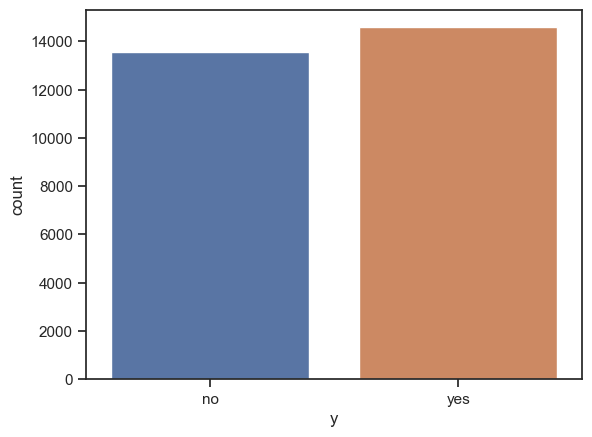

In [474]:
sns.countplot(x='y',data=data)

### Now the data looks much more balanced

## transformation of categorical data for target data only using label encoder

In [475]:
# transformation of categorical data for target data only using label encoder
label_encoder = LabelEncoder()
data['y'] = label_encoder.fit_transform(data['y'])
y_subscription = data["y"]  # Target dla y

## Aanalising the data distribution by plotting graphs for numerical fields

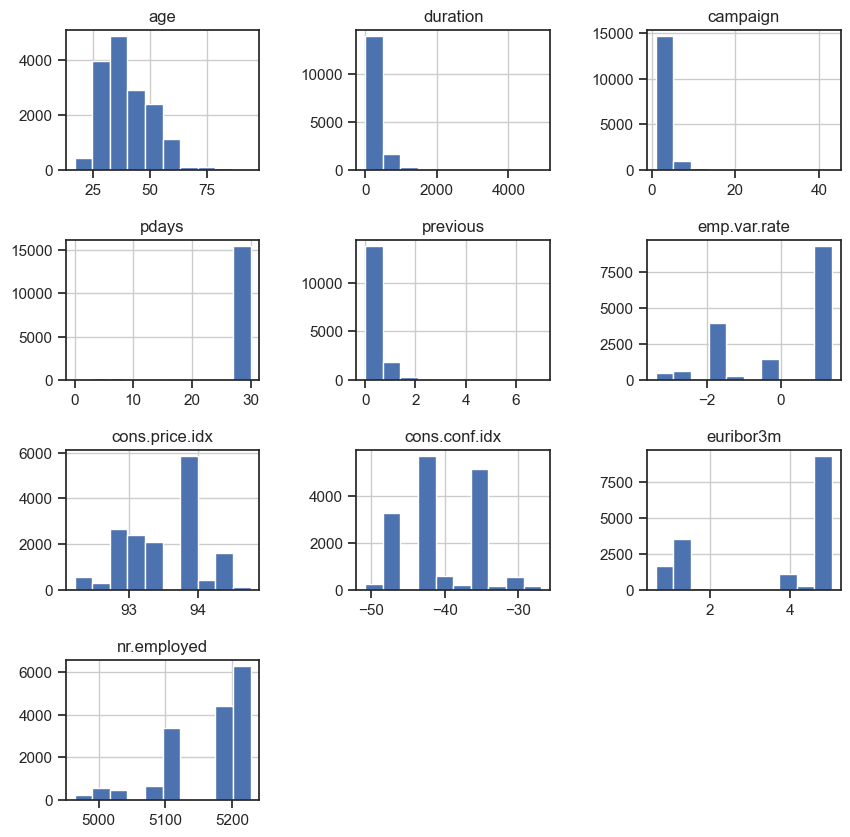

In [234]:
data.hist(column=numerical,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

###  We can see that the data is not evenly distributed, therefore we need to standardize

In [235]:
# print numerical columns

print('Numerical features:', numerical)

Numerical features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [416]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age','duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = scaler.fit_transform(data[['age','duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']])

In [417]:
# print data frame after standarization

num = data[['age','duration', 'campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
num

age  duration  campaign     pdays  previous  emp.var.rate  \
0     -0.260201 -0.353125 -0.585762  0.289468 -0.412466      0.805671   
1      1.379493 -0.110410 -0.585762  0.289468 -0.412466      0.805671   
2      0.084998 -0.380093 -0.585762  0.289468 -0.412466      0.805671   
3     -1.295798 -0.880505 -0.585762  0.289468 -0.412466      0.805671   
4     -1.295798 -0.365111 -0.585762  0.289468 -0.412466      0.805671   
...         ...       ...       ...       ...       ...           ...   
16471 -0.432801  0.123315  0.249975 -3.689096  2.748971     -0.505352   
16472 -0.173902  0.177252 -0.167893  0.289468 -0.412466     -0.505352   
16473 -0.605400 -0.694723 -0.585762  0.289468 -0.412466     -0.505352   
16474  1.897292 -0.407061 -0.585762 -4.148161  9.071846     -0.505352   
16475  2.846589 -0.029505 -0.585762  0.289468 -0.412466     -0.505352   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0            0.770055       0.787139   0.875319     0.515376  
1            0.770055       0.787139   0.875319     0.515376  
2            0.770055       0.787139   0.875319     0.515376  
3            0.770055       0.787139   0.875319     0.515376  
4            0.770055       0.787139   0.875319     0.515376  
...               ...            ...        ...          ...  
16471        2.031959      -2.051557  -1.182150    -2.233983  
16472        2.031959      -2.051557  -1.184842    -2.233983  
16473        2.031959      -2.051557  -1.184304    -2.233983  
16474        2.031959      -2.051557  -1.184304    -2.233983  
16475        2.031959      -2.051557  -1.185919    -2.233983  

[28896 rows x 10 columns]

## Label Encoding

In [339]:
# print categorical columns

print('Categorical features:', categorical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [418]:
# label encoding

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.day_of_week)
data.poutcome = le.fit_transform(data.poutcome)

data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0 -0.260201    7        1          3        0        2     0        1      6   
1  1.379493    7        1          3        0        0     2        1      6   
2  0.084998    1        1          7        1        0     0        1      6   
3 -1.295798    7        2          3        0        2     0        1      6   
4 -1.295798    7        2          3        0        2     0        1      6   

   day_of_week  ...  campaign     pdays  previous  poutcome  emp.var.rate  \
0            1  ... -0.585762  0.289468 -0.412466         1      0.805671   
1            1  ... -0.585762  0.289468 -0.412466         1      0.805671   
2            1  ... -0.585762  0.289468 -0.412466         1      0.805671   
3            1  ... -0.585762  0.289468 -0.412466         1      0.805671   
4            1  ... -0.585762  0.289468 -0.412466         1      0.805671   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0        0.770055       0.787139   0.875319     0.515376  0  
1        0.770055       0.787139   0.875319     0.515376  0  
2        0.770055       0.787139   0.875319     0.515376  1  
3        0.770055       0.787139   0.875319     0.515376  0  
4        0.770055       0.787139   0.875319     0.515376  0  

[5 rows x 21 columns]

## Feature Importance

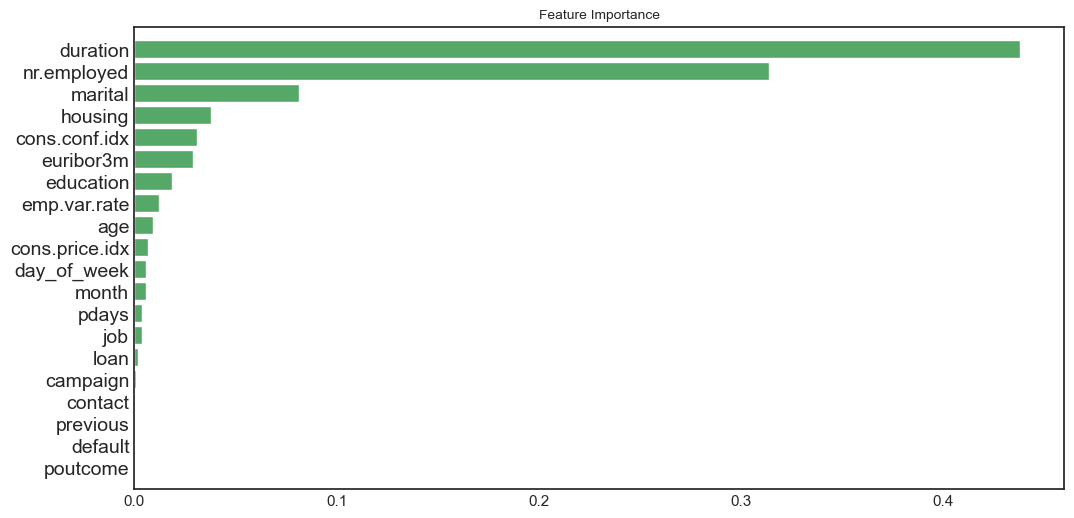

In [419]:
# select the target data
y_reg = data['y']

# select the feature data
X_reg = data[data.columns[:-1]]


# train test split
x_train, x_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.20, random_state=42)



# use decision tree for choosing importance of features
import numpy as np
from sklearn.tree import DecisionTreeClassifier

plt.style.use('seaborn-white')

clf = DecisionTreeClassifier(class_weight='balanced', min_weight_fraction_leaf = 0.01)

clf.fit(x_train, y_train)
importances = clf.feature_importances_
feature_names = X_reg.columns
indices = np.argsort(importances)

def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Feature Importance", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='g',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

## Ok We can drop columns:
- job
- day_of_week
- campaign
- loan
- contact
- pdays
- previous
- poutcome
- month
- default

In [420]:
# drop unnecessary data

my_list = ['job','day_of_week','campaign','loan','contact', 'pdays','previous','poutcome','month','default']

data.drop(my_list, axis=1, inplace=True)

# let`s check data frame

data

age  marital  education  housing  duration  emp.var.rate  \
0     -0.260201        1          3        2 -0.353125      0.805671   
1      1.379493        1          3        0 -0.110410      0.805671   
2      0.084998        1          7        0 -0.380093      0.805671   
3     -1.295798        2          3        2 -0.880505      0.805671   
4     -1.295798        2          3        2 -0.365111      0.805671   
...         ...      ...        ...      ...       ...           ...   
16471 -0.432801        0          0        2  0.123315     -0.505352   
16472 -0.173902        0          6        0  0.177252     -0.505352   
16473 -0.605400        1          5        2 -0.694723     -0.505352   
16474  1.897292        1          6        2 -0.407061     -0.505352   
16475  2.846589        1          5        2 -0.029505     -0.505352   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0            0.770055       0.787139   0.875319     0.515376  0  
1            0.770055       0.787139   0.875319     0.515376  0  
2            0.770055       0.787139   0.875319     0.515376  1  
3            0.770055       0.787139   0.875319     0.515376  0  
4            0.770055       0.787139   0.875319     0.515376  0  
...               ...            ...        ...          ... ..  
16471        2.031959      -2.051557  -1.182150    -2.233983  1  
16472        2.031959      -2.051557  -1.184842    -2.233983  1  
16473        2.031959      -2.051557  -1.184304    -2.233983  1  
16474        2.031959      -2.051557  -1.184304    -2.233983  1  
16475        2.031959      -2.051557  -1.185919    -2.233983  1  

[28896 rows x 11 columns]

## Split data into features and target

In [421]:
# features
X = data[data.columns[:-1]]

# target
y_subscription = data["y"]


# Machine Learning Models

### Now moving on to creating models, I will use two libraries
- Grid search to find the best model parameters
- BaggingClassifier to prevent model overfitting

# Logistic regression model

In [422]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV


# split into training and test set
X_train, X_test, y_train_subscription, y_test_subscription = train_test_split(X, y_subscription, test_size=0.2, random_state=42)


# Creating model
model_subscription = LogisticRegression()

# To avoid having to manually set parameters, we can use grid search to find the best parameters
param_grid = {
    'penalty': ['l1', 'l2', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 1000, 10000],
    'class_weight': ['balanced', None]    # let's define an attempt to balance classes
}


# short summary of parameters according to sklearn official website

     # penealty i.e. punishing the model
         # None: no penalty added;
         #'l2': add an L2 penalty and this is the default choice;
         # 'l1': add L1 penalty

     # C is the inverse of the regularization force; must be a positive floating point number. As in support vector machines, smaller values determine stronger regularization.
     # solver, i.e. an algorithm to be used in an optimization problem.
         # For small datasets, "liblinear" is a good choice
         # For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' support polynomial losses
     # max iter Maximum number of iterations performed for solvers to converge.


# Grid search for the subscription model
grid_search_subscription = GridSearchCV(model_subscription, param_grid, cv=5, scoring='accuracy')
grid_search_subscription.fit(X_train, y_train_subscription)
best_model_subscription = grid_search_subscription.best_estimator_

# Retrain the model for the best parameters
best_model_subscription.fit(X_train, y_train_subscription)

# Create predictions for the target variable on the test data
y_pred_subscription = best_model_subscription.predict(X_test)

# prediction for the target variable on the training set
y_pred_subscription_train = bagging_model_subscription.predict(X_train)

# Model evaluation for y_subscription
accuracy_subscription_logreg = accuracy_score(y_test_subscription, y_pred_subscription)
precision_subscription_logreg = precision_score(y_test_subscription, y_pred_subscription)
recall_subscription_logreg = recall_score(y_test_subscription, y_pred_subscription)
f1_subscription_logreg = f1_score(y_test_subscription, y_pred_subscription)

# assign model ratings for y to variables for training set
accuracy_subscription_logreg_train = accuracy_score(y_train_subscription, y_pred_subscription_train)
precision_subscription_logreg_train = precision_score(y_train_subscription, y_pred_subscription_train)
recall_subscription_logreg_train = recall_score(y_train_subscription, y_pred_subscription_train)
f1_subscription_logreg_train = f1_score(y_train_subscription, y_pred_subscription_train)


### Results on training set

In [423]:
# print model results for training set

print("\nEvaluation for y (Training Set):")
print(f"Accuracy: {accuracy_subscription_logreg_train}")
print(f"Precision: {precision_subscription_logreg_train}")
print(f"Recall: {recall_subscription_logreg_train}")
print(f"F1-Score: {f1_subscription_logreg_train}")


Evaluation for y (Training Set):
Accuracy: 0.5911057276345388
Precision: 0.942557803468208
Recall: 0.2192068559905898
F1-Score: 0.35569188820722564


### Confusion matrix on training set

confusion matrix: subscription accuracy 0.5911057276345388


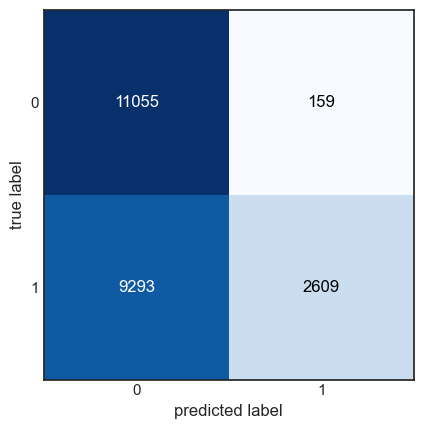

In [424]:
# confusion matrix for subscription on training set

cm_train = confusion_matrix(y_train_subscription, y_pred_subscription_train)
plot_confusion_matrix(cm_train)

print('confusion matrix: subscription accuracy',accuracy_subscription_logreg_train)

### Results on test set

In [425]:
# print the model score for target variable

print("\nEvaluation for y:")
print(f"Accuracy: {accuracy_subscription_logreg}")
print(f"Precision: {precision_subscription_logreg}")
print(f"Recall: {recall_subscription_logreg}")
print(f"F1-Score: {f1_subscription_logreg}")


Evaluation for y:
Accuracy: 0.7280276816608997
Precision: 0.7537260468417317
Recall: 0.7075283144570287
F1-Score: 0.7298969072164947


### Confusion matrix on test set

confusion matrix: subscription accuracy 0.7280276816608997


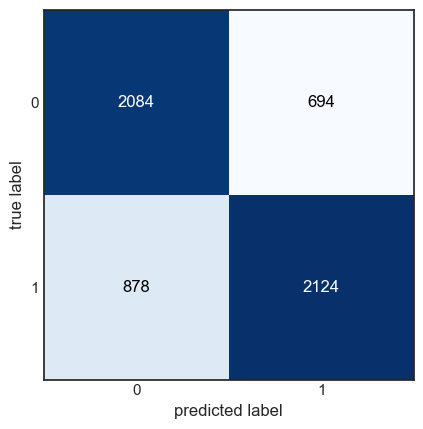

In [426]:
# results visualization subscription on test set

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix


cm = confusion_matrix(y_test_subscription, y_pred_subscription)
plot_confusion_matrix(cm)

print('confusion matrix: subscription accuracy',accuracy_subscription_logreg)

## As we can see, the results on the training set are poor. our accuracy is only 0.59. We do not predict class 1 very well. We shouldnt rely on a good result on the test set in this case.

### Let's try a decision tree


# Decision tree

In [427]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# split for training and testing data
X_train, X_test, y_train_subscription, y_test_subscription = train_test_split(X, y_subscription, test_size=0.2, random_state=42)

# create model for the target variable
model_subscription = DecisionTreeClassifier(random_state=42)


# grid search params
param_grid = {
    'criterion': ['gini', 'entropy'],        # gini or entropy
    'max_depth': [None, 10, 20, 30, 40, 50], # max depth
    'min_samples_split': [2, 5, 10],         # Min samples value needed to split
    'min_samples_leaf': [1, 2, 4],           # Min samples value needed to being in a leaf node
    'class_weight': ['balanced', None]       # distribution of class weights, balanced should automatically set the weights according to the distribution zmiennych
}

# best estimator for model_subscription
grid_search_subscription = GridSearchCV(model_subscription, param_grid, cv=5, scoring='accuracy')
grid_search_subscription.fit(X_train, y_train_subscription)
best_model_subscription = grid_search_subscription.best_estimator_

# create bagging for the target variable with best estimator 
# here we eliminate the possibility of overfitting the model. unfortunately, decision trees have a tendency to overfit
bagging_model_subscription = BaggingClassifier(best_model_subscription, n_estimators=100, random_state=42)

# train the model
bagging_model_subscription.fit(X_train, y_train_subscription)

# prediction for the target variable on test data
y_pred_subscription = bagging_model_subscription.predict(X_test)

# prediction for the target variable on the training set
y_pred_subscription_train = bagging_model_subscription.predict(X_train)

# assign model ratings for y to variables for test set
accuracy_subscription_dectrees = accuracy_score(y_test_subscription, y_pred_subscription)
precision_subscription_dectrees = precision_score(y_test_subscription, y_pred_subscription)
recall_subscription_dectrees = recall_score(y_test_subscription, y_pred_subscription)
f1_subscription_dectrees = f1_score(y_test_subscription, y_pred_subscription)


# assign model ratings for y to variables for training set
accuracy_subscription_dectrees_train = accuracy_score(y_train_subscription, y_pred_subscription_train)
precision_subscription_dectrees_train = precision_score(y_train_subscription, y_pred_subscription_train)
recall_subscription_dectrees_train = recall_score(y_train_subscription, y_pred_subscription_train)
f1_subscription_dectrees_train = f1_score(y_train_subscription, y_pred_subscription_train)


### Results on training set

In [428]:
# print model results for training set

print("\nEvaluation for y (Training Set):")
print(f"Accuracy: {accuracy_subscription_dectrees_train}")
print(f"Precision: {precision_subscription_dectrees_train}")
print(f"Recall: {recall_subscription_dectrees_train}")
print(f"F1-Score: {f1_subscription_dectrees_train}")


Evaluation for y (Training Set):
Accuracy: 0.9999134798408029
Precision: 0.9998319892473119
Recall: 1.0
F1-Score: 0.9999159875661597


### Confusion matrix on training set

confusion matrix: subscription accuracy 0.9999134798408029


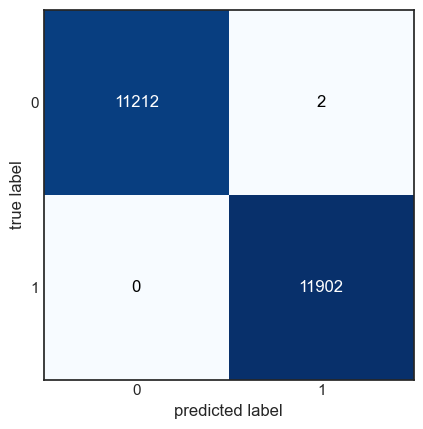

In [429]:
# confusion matrix for subscription on training set

cm_train = confusion_matrix(y_train_subscription, y_pred_subscription_train)
plot_confusion_matrix(cm_train)

print('confusion matrix: subscription accuracy',accuracy_subscription_dectrees_train)

### Results on test set

In [430]:
# print model results on test set

print("\nEvaluation for y:")
print(f"Accuracy: {accuracy_subscription_dectrees}")
print(f"Precision: {precision_subscription_dectrees}")
print(f"Recall: {recall_subscription_dectrees}")
print(f"F1-Score: {f1_subscription_dectrees}")


Evaluation for y:
Accuracy: 0.9517301038062284
Precision: 0.9149649497104542
Recall: 1.0
F1-Score: 0.9555944612446284


### Confusion matrix on test set

confusion matrix: subscription accuracy 0.9517301038062284


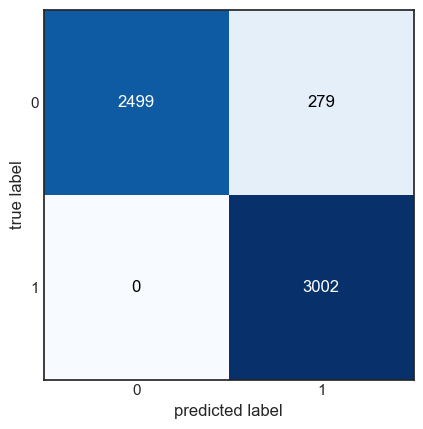

In [431]:
# confusion matrix for subscription on test set

cm = confusion_matrix(y_test_subscription, y_pred_subscription)
plot_confusion_matrix(cm)

print('confusion matrix: subscription accuracy',accuracy_subscription_dectrees)

### Ploting decision trees

In [353]:
#  plot decision tree for target subscription

from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dot_data = StringIO()
export_graphviz(best_model_subscription, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['no-subs', 'yes-subs'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_subs.png')
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.923092 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.923092 to fit



## as we can see, the difference between training and testing results is small. The model has a high acc of 0.95. And in class 1 we make mistakes a small number of times

### The 3nd model I will use is knn

# KNeighborsClassifier

In [432]:
warnings.warn = warn


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Split the dataset into training and test sets
X_train, X_test, y_train_subscription, y_test_subscription = train_test_split(X, y_subscription, test_size=0.2, random_state=42)

# Create KNN models for the target variable
model_subscription = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'p': [1, 2],  # Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
    'leaf_size': [10, 20, 30],  # Leaf size passed to BallTree or KDTree
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'metric': ['euclidean', 'manhattan']
}


# Find the best estimator for model_subscription
grid_search_subscription = GridSearchCV(model_subscription, param_grid, cv=5, scoring='accuracy')
grid_search_subscription.fit(X_train, y_train_subscription)
best_model_subscription = grid_search_subscription.best_estimator_

# Create bagging model for the target variable with the best estimator
bagging_model_subscription = BaggingClassifier(best_model_subscription, n_estimators=100, random_state=42)

# Train the model
bagging_model_subscription.fit(X_train, y_train_subscription)

# prediction for the target variable on the training set
y_pred_subscription_train = bagging_model_subscription.predict(X_train)

# Predict for the target variable on the test set
y_pred_subscription = bagging_model_subscription.predict(X_test)

# Assign model evaluation metrics for subscription
accuracy_subscription_knn = accuracy_score(y_test_subscription, y_pred_subscription)
precision_subscription_knn = precision_score(y_test_subscription, y_pred_subscription)
recall_subscription_knn = recall_score(y_test_subscription, y_pred_subscription)
f1_subscription_knn = f1_score(y_test_subscription, y_pred_subscription)


# assign model ratings for y to variables for training set
accuracy_subscription_knn_train = accuracy_score(y_train_subscription, y_pred_subscription_train)
precision_subscription_knn_train = precision_score(y_train_subscription, y_pred_subscription_train)
recall_subscription_knn_train = recall_score(y_train_subscription, y_pred_subscription_train)
f1_subscription_knn_train = f1_score(y_train_subscription, y_pred_subscription_train)

### Results on training set

In [433]:
# print model results for training set

print("\nEvaluation for y (Training Set):")
print(f"Accuracy: {accuracy_subscription_knn_train}")
print(f"Precision: {precision_subscription_knn_train}")
print(f"Recall: {recall_subscription_knn_train}")
print(f"F1-Score: {f1_subscription_knn_train}")


Evaluation for y (Training Set):
Accuracy: 0.9999134798408029
Precision: 0.9998319892473119
Recall: 1.0
F1-Score: 0.9999159875661597


### Confusion matrix on training set

confusion matrix: subscription accuracy 0.9999134798408029


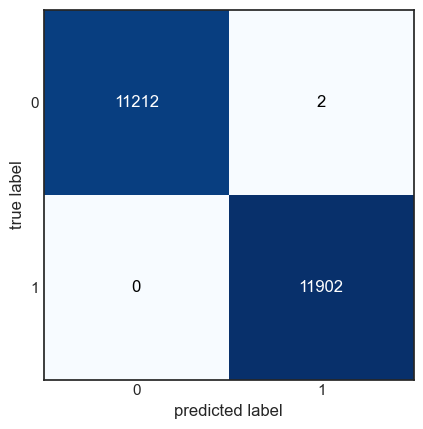

In [434]:
# confusion matrix for subscription on training set

cm_train = confusion_matrix(y_train_subscription, y_pred_subscription_train)
plot_confusion_matrix(cm_train)

print('confusion matrix: subscription accuracy',accuracy_subscription_knn_train)

### Results on test set

In [435]:
# print model results for test set

print("\nEvaluation for y:")
print(f"Accuracy: {accuracy_subscription_knn}")
print(f"Precision: {precision_subscription_knn}")
print(f"Recall: {recall_subscription_knn}")
print(f"F1-Score: {f1_subscription_knn}")


Evaluation for y:
Accuracy: 0.8982698961937716
Precision: 0.8362116991643455
Recall: 1.0
F1-Score: 0.9108009708737864


### Confusion matrix on test set

confusion matrix: subscription accuracy 0.8982698961937716


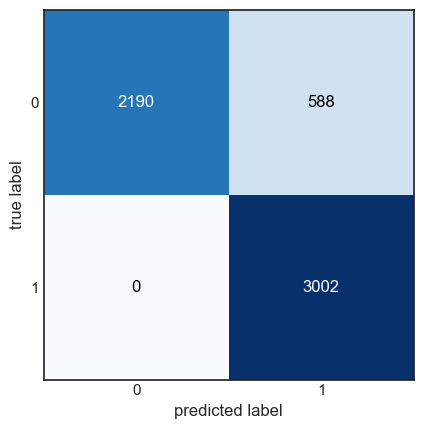

In [436]:
# confusion matrix for subscription test on test set

cm = confusion_matrix(y_test_subscription, y_pred_subscription)
plot_confusion_matrix(cm)

print('confusion matrix: subscription accuracy',accuracy_subscription_knn)

## as we can see, the results on the test set are slightly worse than on the training set. Acc = 0.89. We predict class 0 incorrectly more often than in the case of decision trees

#  Comparing results

###  we will create a metrics comparison chart for the Subscription target variable

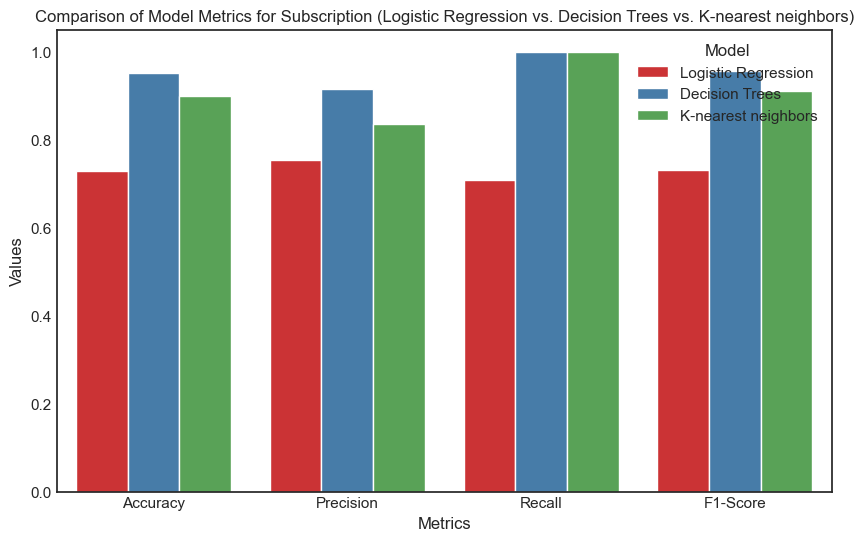

In [437]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# let's create a data frame with the model evaluation results
data_logreg = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Model': 'Logistic Regression',
    'Value': [accuracy_subscription_logreg, precision_subscription_logreg, recall_subscription_logreg, f1_subscription_logreg]
})

data_dectrees = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Model': 'Decision Trees',
    'Value': [accuracy_subscription_dectrees, precision_subscription_dectrees, recall_subscription_dectrees, f1_subscription_dectrees]
})


data_knn_subscription = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Model': 'K-nearest neighbors',
    'Value': [accuracy_subscription_knn, precision_subscription_knn, recall_subscription_knn, f1_subscription_knn]
})


# concat data frames
data = pd.concat([data_logreg, data_dectrees, data_knn_subscription])

# chart size
plt.figure(figsize=(10, 6))

# create chart
sns.barplot(data=data, x='Metric', y='Value', hue='Model', palette='Set1')

# label names
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Model Metrics for Subscription (Logistic Regression vs. Decision Trees vs. K-nearest neighbors)')

# legend
plt.legend(title='Model', loc='upper right')


plt.show()


# Conclusion: Best model is Decission Trees

## Next steps:

### I think that to improve the accuracy of the variable and improve the correctness of class prediction, We should try:
  - change the standardization method from label encoder to one hot encoder. In the case of linear regression and k nearest neighbors, one hot encoder works better. Especially if we have more than 2 classes
